🧪 Esercizio: Classificazione con il dataset "wine"
🎯 Obiettivo: Costruisci un modello di classificazione per prevedere la categoria di un vino in base alle sue caratteristiche chimiche.

1. 📦 Carica il dataset
Usa sklearn.datasets.load_wine.

Inseriscilo in un pandas.DataFrame con le feature come colonne.

2. 📊 Esplora i dati
Visualizza le prime righe con df.head().

Verifica quante classi ci sono nel target (df['target'].value_counts()).

Facoltativo: fai un grafico con seaborn.pairplot() o simili.

3. ✂️ Dividi il dataset
Separa le feature (X) e il target (y).

Usa train_test_split con test_size=0.2 e random_state=42.

In [23]:
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

target
1    71
0    59
2    48
Name: count, dtype: int64
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od

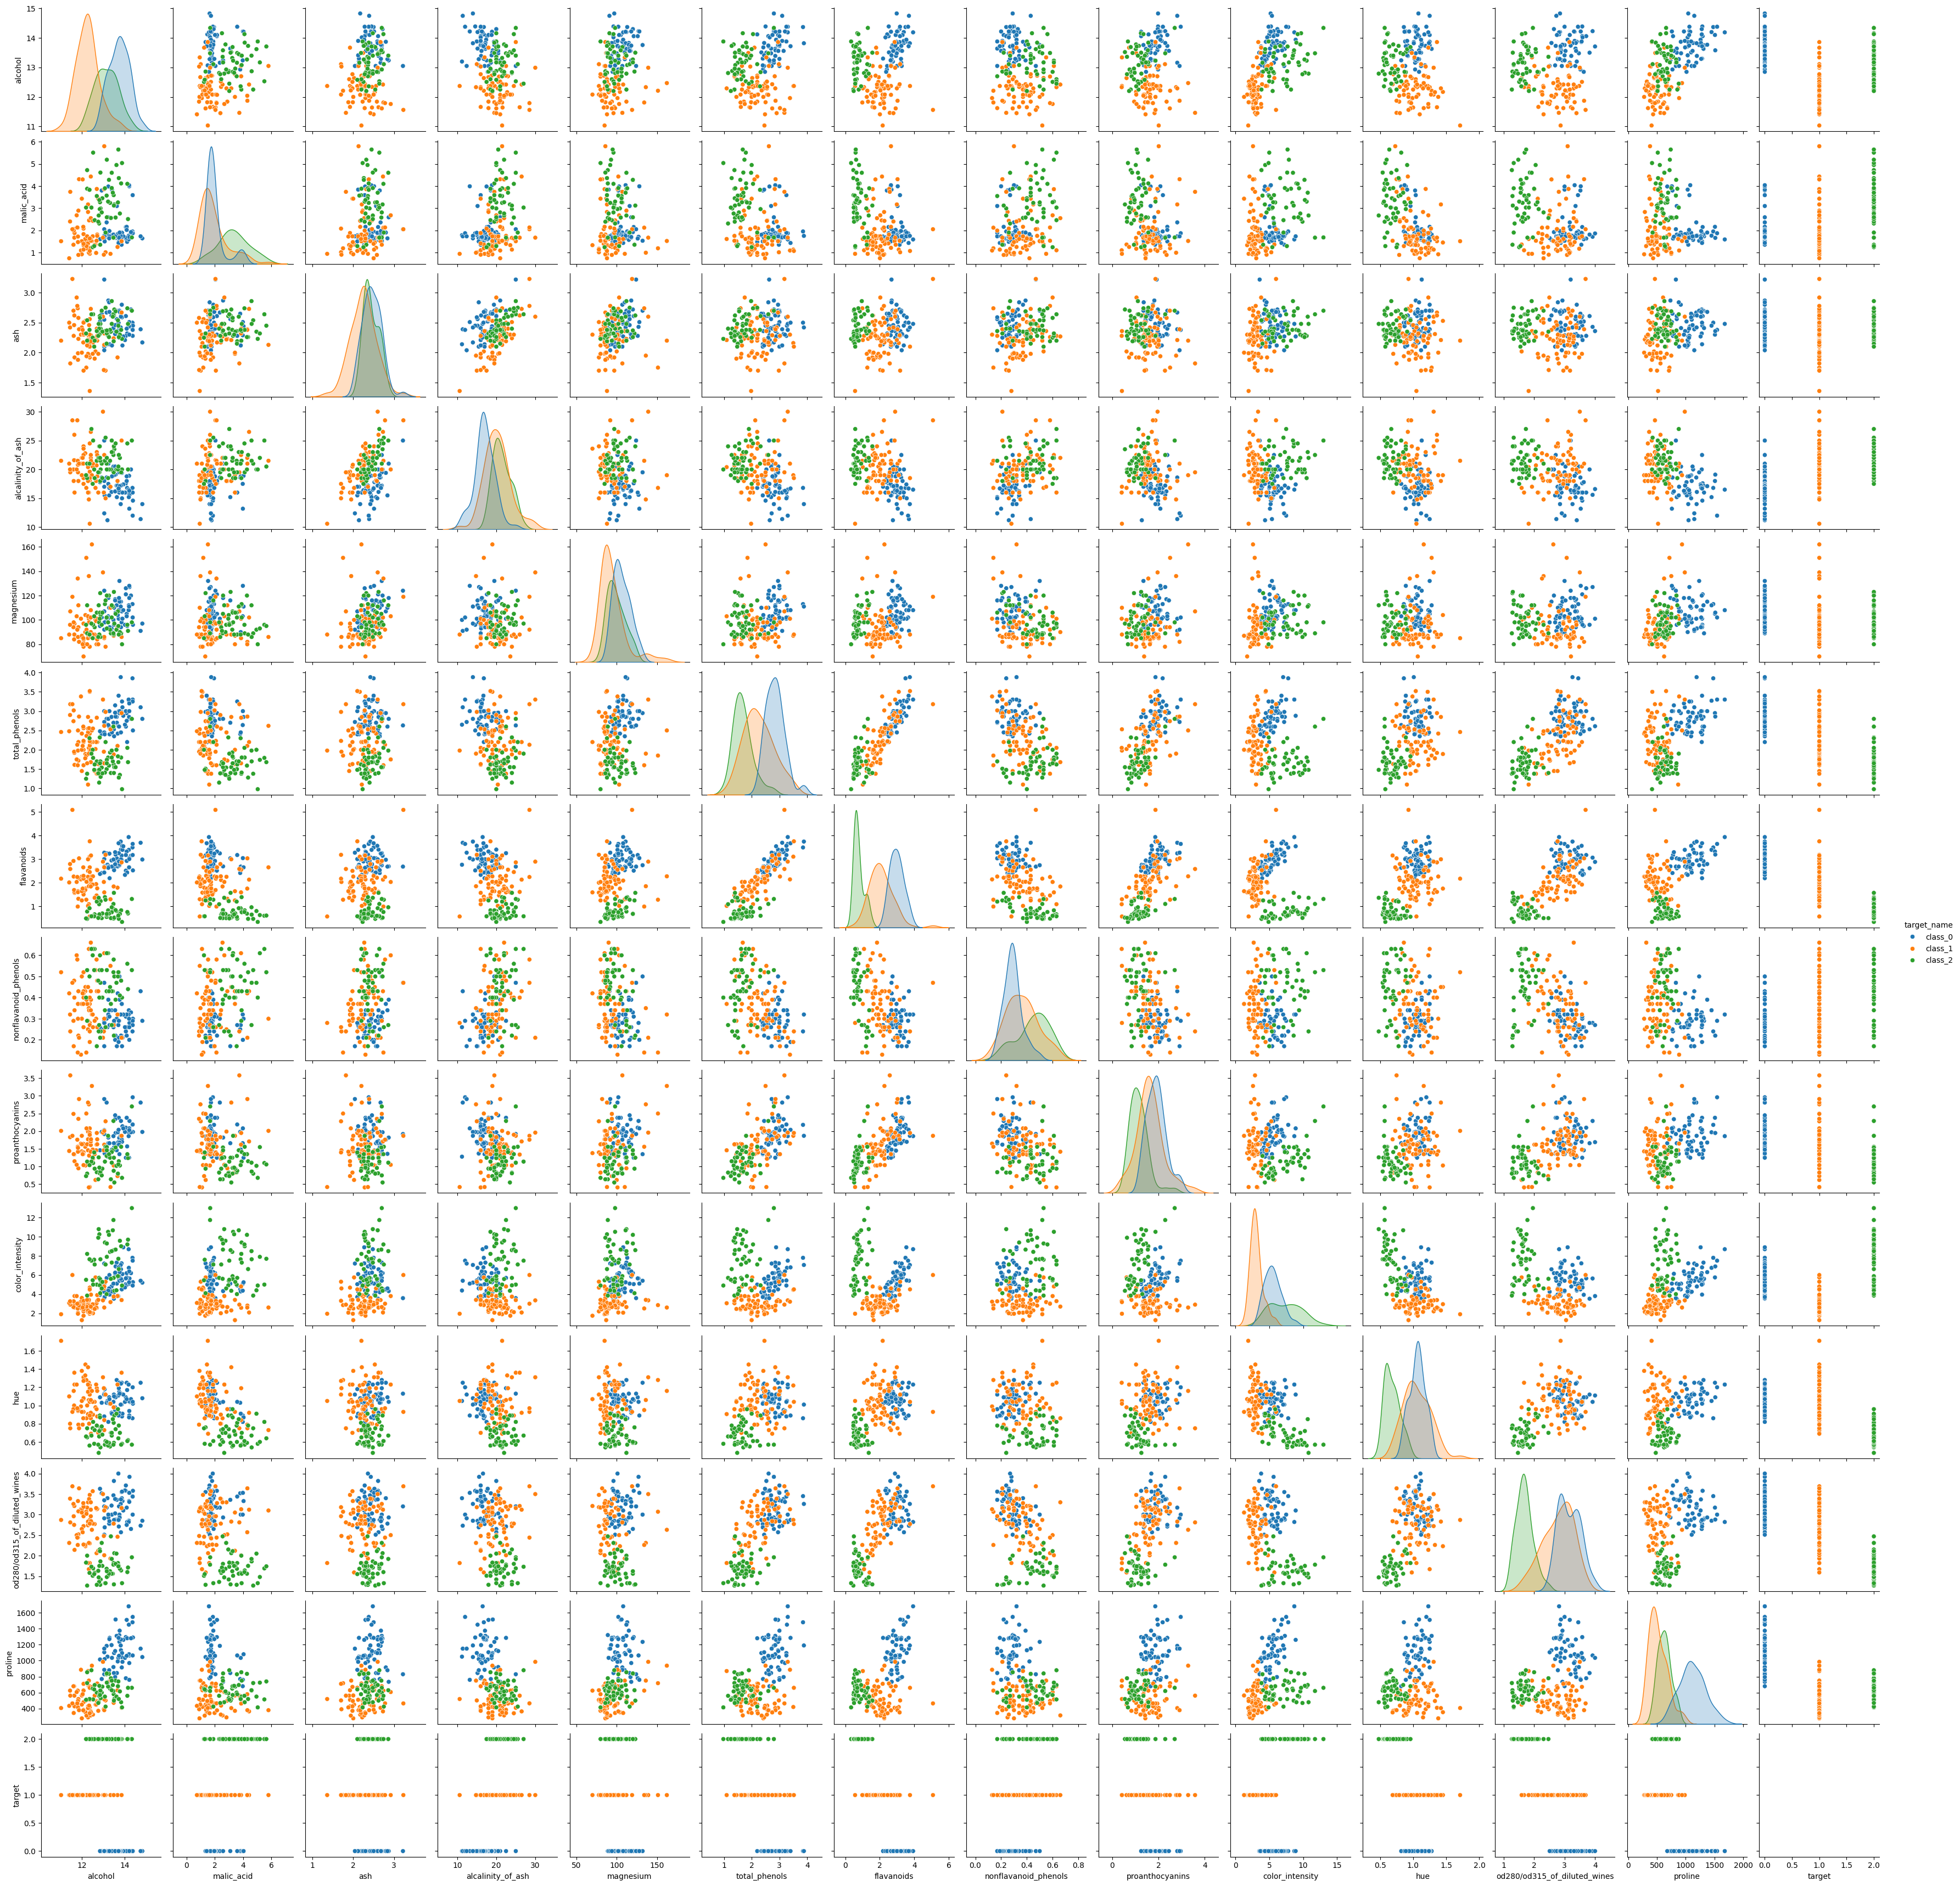

In [12]:

wine = sklearn.datasets.load_wine()
df = pandas.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target_name'] = df['target'].map(dict(enumerate(wine.target_names)))
print(df['target'].value_counts())
print(df.head())
seaborn.pairplot(df, hue='target_name')

🧠 Step 4: Scegli un modello
Scegli uno dei seguenti algoritmi e usalo per addestrare il tuo modello:

Algoritmo	                Classe scikit-learn	    Suggerito se...
Albero decisionale	        DecisionTreeClassifier	Vuoi capire facilmente come decide
Random Forest	            RandomForestClassifier	Vuoi un buon modello "generico"
Regressione logistica	    LogisticRegression	    Vuoi un modello semplice e lineare
KNN	                        KNeighborsClassifier	Vuoi un approccio intuitivo
Naive Bayes	                GaussianNB	            Vuoi un modello molto veloce e leggero

In [13]:
# 🔍 Divisione in training e test set
X = df[wine.feature_names]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. 🧪 Addestra e valuta
Allena il modello con .fit(X_train, y_train).

Fai previsioni con .predict(X_test).

Calcola la accuracy, il classification report e la confusion matrix.

In [14]:
# 🌲 Addestramento modello Random Forest
clf_r_forest = RandomForestClassifier(random_state=42)
clf_r_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# 🔮 Predizione e valutazione Random Forest
y_pred = clf_r_forest.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))

Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



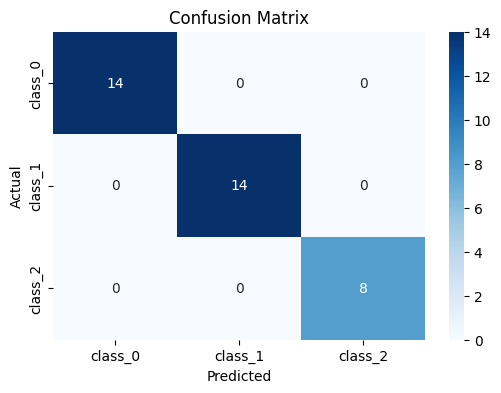

In [18]:
# 📉 Matrice di confusione
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Addestramento modello KNeighbors
clf_kn = KNeighborsClassifier()
clf_kn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# 🔮 Predizione e valutazione Random Forest
y_pred_kn = clf_kn.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_kn, target_names=wine.target_names))

Classification Report:
               precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.79      0.79      0.79        14
     class_2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



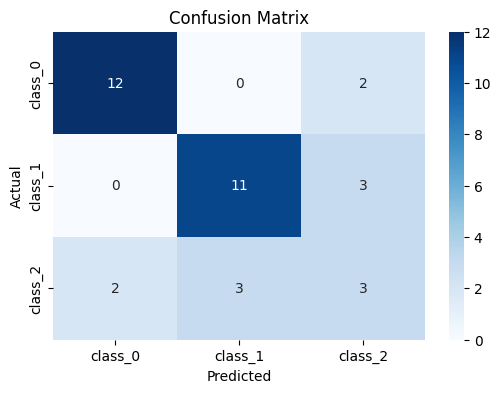

In [ ]:
# 📉 Matrice di confusione
cm = confusion_matrix(y_test, y_pred_kn)
plt.figure(figsize=(6,4))
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
               precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



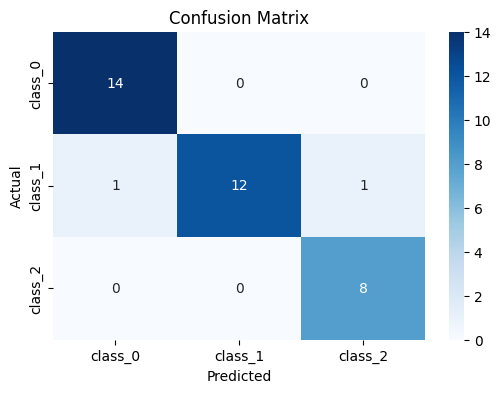

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf_kn.fit(X_train_scaled, y_train)
y_pred_kn_scaled = clf_kn.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred_kn_scaled, target_names=wine.target_names))

cm = confusion_matrix(y_test, y_pred_kn_scaled)
plt.figure(figsize=(6,4))
seaborn.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()